In [1]:
from pathlib import Path
import pandas as pd
from tqdm import tqdm
from datetime import datetime, timedelta
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew

In [18]:
path = Path('.')
dataframes = {}
columns =  ['dates','subframe_n','subframe_ind','rnti','direction','mcs']
for p in list(path.glob('new_A')):
    for file in tqdm(list(p.glob('*.csv*'))):
        df = pd.read_csv(file, names = columns)
        with pd.option_context('mode.use_inf_as_null', True):
            df = df.dropna()#fillna(0)#dropna(subset=['subframe_ind', 'rnti', 'direction', 'mcs'], how='all')
        df[['subframe_ind', 'rnti', 'direction', 'mcs']] = df[['subframe_ind', 'rnti', 'direction', 'mcs']].astype(np.int)
        df.dates = pd.to_datetime(df.dates, format='%Y%m%d%H%M%S')
        dataframes[file.parts[-1]]=df#.sort_values('rnti').reset_index(drop = True)

df = pd.concat([dataframes[key] for key in dataframes.keys()])

100%|██████████| 42/42 [01:10<00:00,  1.95it/s]


In [19]:
df['date_delta'] = (df['dates'] - df['dates'].min())  / np.timedelta64(1,'s')

In [20]:
print(df.info())
print(df.describe())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10628508 entries, 0 to 20754
Data columns (total 7 columns):
dates           datetime64[ns]
subframe_n      int64
subframe_ind    int32
rnti            int32
direction       int32
mcs             int32
date_delta      float64
dtypes: datetime64[ns](1), float64(1), int32(4), int64(1)
memory usage: 486.5 MB
None
         subframe_n  subframe_ind          rnti     direction           mcs  \
count  1.062851e+07  1.062851e+07  1.062851e+07  1.062851e+07  1.062851e+07   
mean   3.876660e+02  4.624876e+00  3.026881e+04  6.992104e-01  8.546959e+00   
std    3.426556e+02  2.918137e+00  2.272781e+04  4.586014e-01  9.615075e+00   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    6.800000e+01  2.000000e+00  1.107500e+04  0.000000e+00  0.000000e+00   
50%    2.980000e+02  5.000000e+00  2.476200e+04  1.000000e+00  4.000000e+00   
75%    6.870000e+02  7.000000e+00  5.322000e+04  1.000000e+00  1.500000e+01   
max   

,dates,subframe_n,subframe_ind,rnti,direction,mcs,date_delta
0,2017-03-23 00:00:00,28,4,46997,1,20,0.0
1,2017-03-23 00:00:01,53,5,32000,1,20,1.0
2,2017-03-23 00:00:01,85,3,45928,1,0,1.0
3,2017-03-23 00:00:01,91,9,5,1,0,1.0
4,2017-03-23 00:00:02,27,8,22109,1,4,2.0



 mu = 387.67 and sigma = 342.66



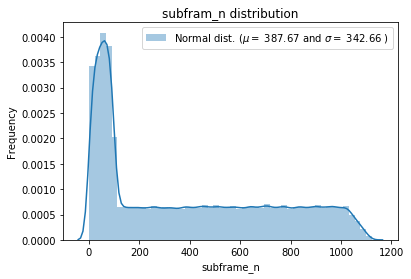

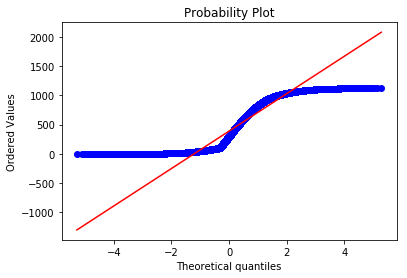

In [23]:
target = 'subframe_n'
plt.figure()
sns.distplot(df[target]);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df[target])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('subfram_n distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df[target], plot=plt)
plt.show()


 mu = 4.62 and sigma = 2.92



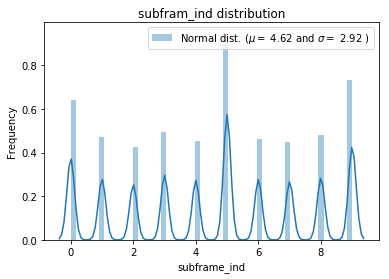

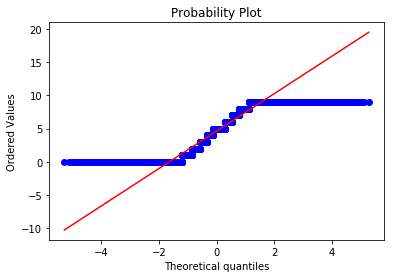

In [24]:
target = 'subframe_ind'
plt.figure()
sns.distplot(df[target]);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df[target])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('subfram_ind distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df[target], plot=plt)
plt.show()


 mu = 30268.81 and sigma = 22727.81



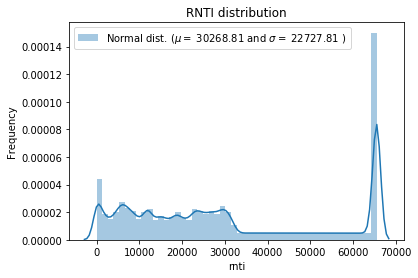

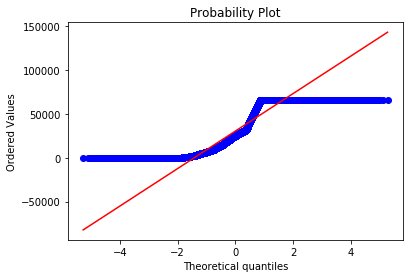

In [25]:
target = 'rnti'
plt.figure()
sns.distplot(df[target]);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df[target])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('RNTI distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df[target], plot=plt)
plt.show()


 mu = 8.55 and sigma = 9.62



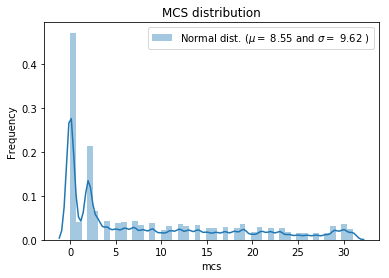

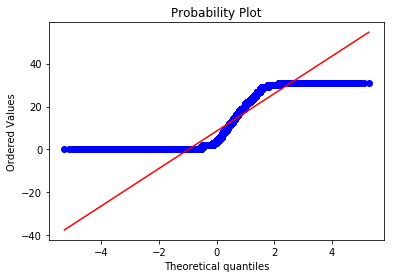

In [26]:
target = 'mcs'
plt.figure()
sns.distplot(df[target]);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df[target])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('MCS distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df[target], plot=plt)
plt.show()


 mu = 225038.20 and sigma = 170199.29



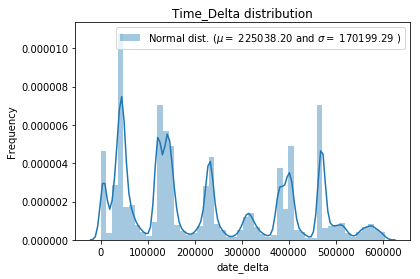

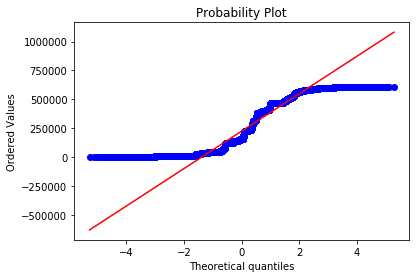

In [27]:
target = 'date_delta'
plt.figure()
sns.distplot(df[target]);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df[target])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Time_Delta distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df[target], plot=plt)
plt.show()

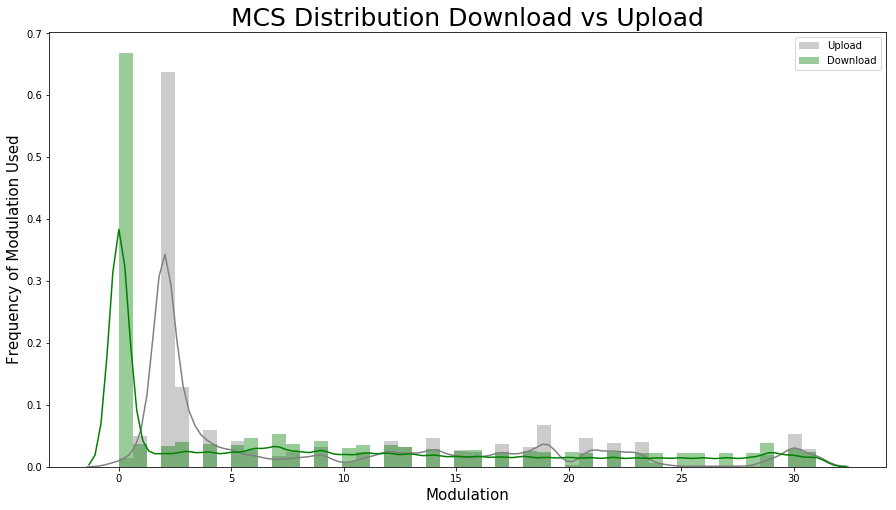

In [28]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
ax=sns.distplot(df.loc[(df['direction'] == 0),'mcs'] , color='gray',label='Upload')
ax=sns.distplot(df.loc[(df['direction'] == 1),'mcs'] , color='g', label='Download')
plt.title('MCS Distribution Download vs Upload', fontsize = 25)
plt.ylabel("Frequency of Modulation Used", fontsize = 15)
plt.xlabel("Modulation", fontsize = 15)
plt.legend()

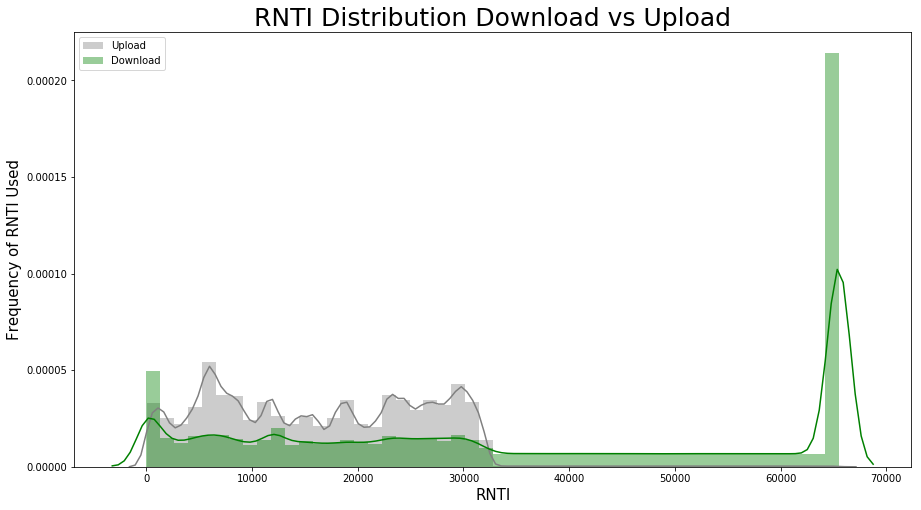

In [29]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
ax=sns.distplot(df.loc[(df['direction'] == 0),'rnti'] , color='gray',label='Upload')
ax=sns.distplot(df.loc[(df['direction'] == 1),'rnti'] , color='g', label='Download')
plt.title('RNTI Distribution Download vs Upload', fontsize = 25)
plt.ylabel("Frequency of RNTI Used", fontsize = 15)
plt.xlabel("RNTI", fontsize = 15)
plt.legend()

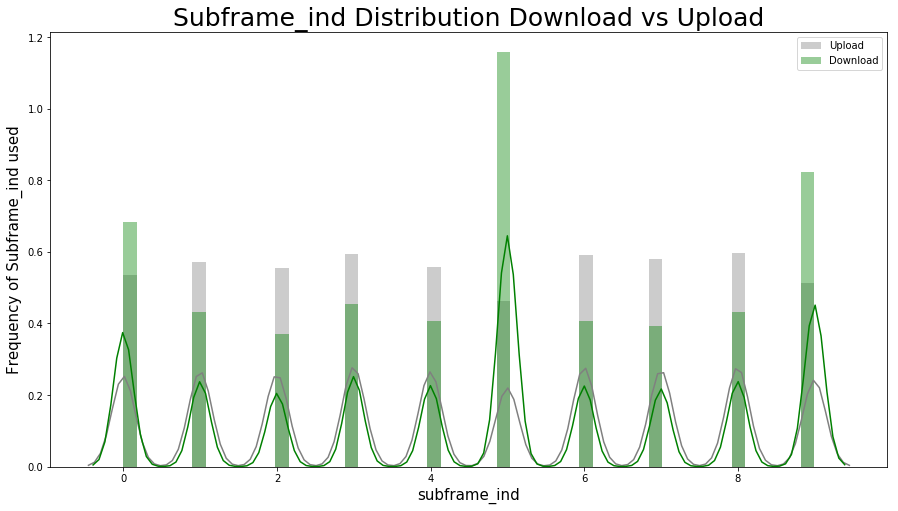

In [30]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
ax=sns.distplot(df.loc[(df['direction'] == 0),'subframe_ind'] , color='gray',label='Upload')
ax=sns.distplot(df.loc[(df['direction'] == 1),'subframe_ind'] , color='g', label='Download')
plt.title('Subframe_ind Distribution Download vs Upload', fontsize = 25)
plt.ylabel("Frequency of Subframe_ind used", fontsize = 15)
plt.xlabel("subframe_ind", fontsize = 15)
plt.legend()

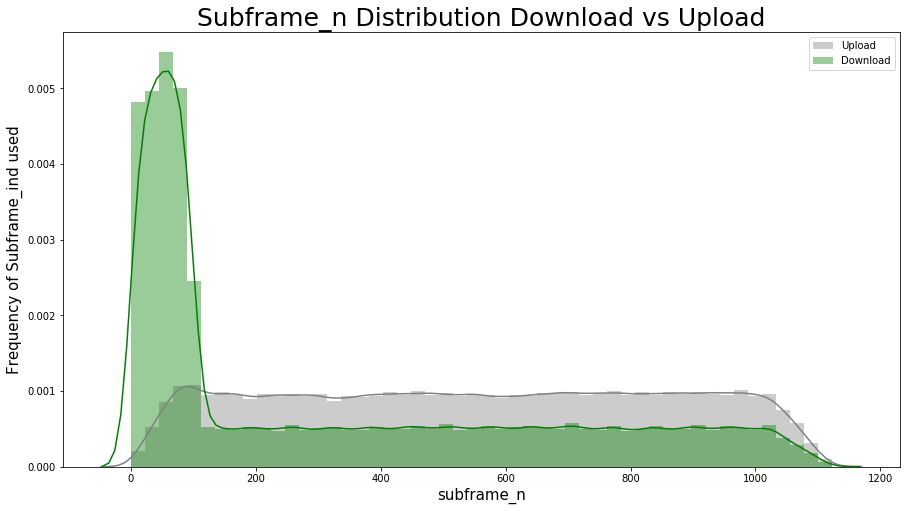

In [31]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
ax=sns.distplot(df.loc[(df['direction'] == 0),'subframe_n'] , color='gray',label='Upload')
ax=sns.distplot(df.loc[(df['direction'] == 1),'subframe_n'] , color='g', label='Download')
plt.title('Subframe_n Distribution Download vs Upload', fontsize = 25)
plt.ylabel("Frequency of Subframe_ind used", fontsize = 15)
plt.xlabel("subframe_n", fontsize = 15)
plt.legend()

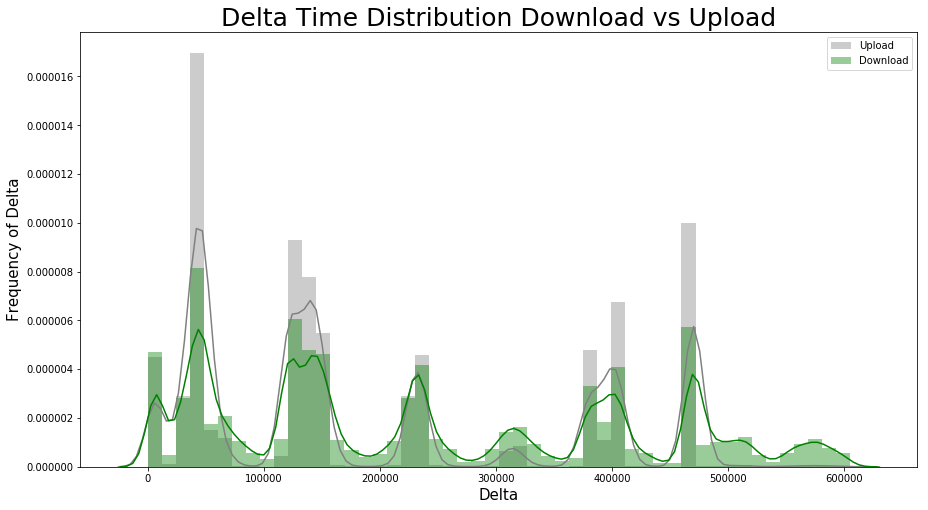

In [32]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
ax=sns.distplot(df.loc[(df['direction'] == 0),'date_delta'] , color='gray',label='Upload')
ax=sns.distplot(df.loc[(df['direction'] == 1),'date_delta'] , color='g', label='Download')
plt.title('Delta Time Distribution Download vs Upload', fontsize = 25)
plt.ylabel("Frequency of Delta", fontsize = 15)
plt.xlabel("Delta", fontsize = 15)
plt.legend()

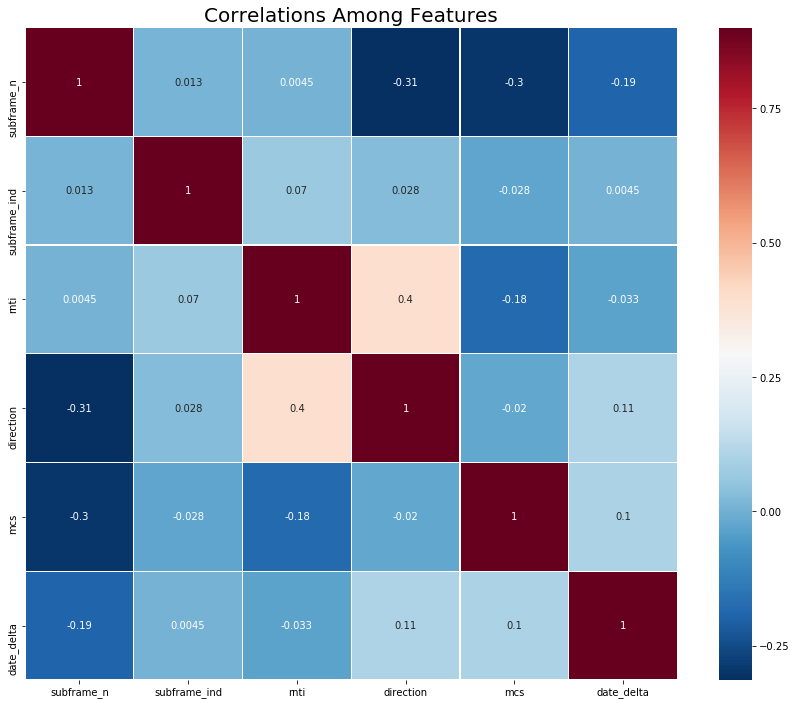

In [33]:
plt.subplots(figsize = (15,12))
sns.heatmap(df.corr(), 
            annot=True,
            #mask = mask,
            cmap = 'RdBu_r',
            linewidths=0.1, 
            linecolor='white',
            vmax = .9,
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20);

In [34]:
from sklearn.model_selection import train_test_split
from sklearn import metrics


from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import  GradientBoostingRegressor

from sklearn.linear_model import ElasticNet, Lasso
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

from mlxtend.regressor import StackingRegressor

In [35]:
y = df['mcs']
x = df.loc[:, (df.columns != 'mcs') * (df.columns != 'dates')]
x = np.array(x, dtype = np.int32)
y = np.array(y, dtype = np.int32)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 0)

In [11]:
rf = RandomForestRegressor(n_estimators = 300, verbose = 1, n_jobs = -1, max_depth = 20)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    6.4s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:   37.2s
[Parallel(n_jobs=16)]: Done 300 out of 300 | elapsed:  1.1min finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 300 out of 300 | elapsed:    0.3s finished


Mean Absolute Error: 2.57875203524154
Mean Squared Error: 24.13724321827598
Root Mean Squared Error: 4.912966844817496


In [36]:
# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

# specify your configurations as a dict
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l1'},
    'num_leaves': 400,
    'learning_rate': 0.1,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0,
    'max_bin' : 1000
}

print('Starting training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=500,
                valid_sets=lgb_eval,
                early_stopping_rounds=5)

y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

Starting training...
[1]	valid_0's l1: 7.87558
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's l1: 7.66765
[3]	valid_0's l1: 7.38872
[4]	valid_0's l1: 7.14411
[5]	valid_0's l1: 6.92953
[6]	valid_0's l1: 6.74962
[7]	valid_0's l1: 6.64211
[8]	valid_0's l1: 6.48586
[9]	valid_0's l1: 6.35373
[10]	valid_0's l1: 6.23287
[11]	valid_0's l1: 6.11937
[12]	valid_0's l1: 6.02479
[13]	valid_0's l1: 5.93479
[14]	valid_0's l1: 5.85388
[15]	valid_0's l1: 5.81255
[16]	valid_0's l1: 5.74329
[17]	valid_0's l1: 5.69041
[18]	valid_0's l1: 5.64388
[19]	valid_0's l1: 5.60034
[20]	valid_0's l1: 5.55027
[21]	valid_0's l1: 5.51502
[22]	valid_0's l1: 5.47353
[23]	valid_0's l1: 5.44554
[24]	valid_0's l1: 5.41218
[25]	valid_0's l1: 5.38095
[26]	valid_0's l1: 5.36838
[27]	valid_0's l1: 5.34869
[28]	valid_0's l1: 5.32869
[29]	valid_0's l1: 5.3196
[30]	valid_0's l1: 5.30546
[31]	valid_0's l1: 5.29064
[32]	valid_0's l1: 5.27782
[33]	valid_0's l1: 5.2593
[34]	valid_0's l1: 5.24948
[35]	valid_

[295]	valid_0's l1: 4.9057
[296]	valid_0's l1: 4.90469
[297]	valid_0's l1: 4.90457
[298]	valid_0's l1: 4.90375
[299]	valid_0's l1: 4.90372
[300]	valid_0's l1: 4.90373
[301]	valid_0's l1: 4.90207
[302]	valid_0's l1: 4.90192
[303]	valid_0's l1: 4.90169
[304]	valid_0's l1: 4.90041
[305]	valid_0's l1: 4.90036
[306]	valid_0's l1: 4.89952
[307]	valid_0's l1: 4.89909
[308]	valid_0's l1: 4.89907
[309]	valid_0's l1: 4.89814
[310]	valid_0's l1: 4.89798
[311]	valid_0's l1: 4.89802
[312]	valid_0's l1: 4.8981
[313]	valid_0's l1: 4.89788
[314]	valid_0's l1: 4.89793
[315]	valid_0's l1: 4.89791
[316]	valid_0's l1: 4.89782
[317]	valid_0's l1: 4.89738
[318]	valid_0's l1: 4.89707
[319]	valid_0's l1: 4.89686
[320]	valid_0's l1: 4.89669
[321]	valid_0's l1: 4.89594
[322]	valid_0's l1: 4.89551
[323]	valid_0's l1: 4.89526
[324]	valid_0's l1: 4.89488
[325]	valid_0's l1: 4.89483
[326]	valid_0's l1: 4.89485
[327]	valid_0's l1: 4.89488
[328]	valid_0's l1: 4.89486
[329]	valid_0's l1: 4.89454
[330]	valid_0's l1: 4.

In [67]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
lasso.fit(X_train,y_train)
y_pred = lasso.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

Mean Absolute Error: 5.524847715692272
Mean Squared Error: 56.700967612233136
Root Mean Squared Error: 7.530004489522774


In [7]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=400,
                              learning_rate=0.1, n_estimators=1000,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.9,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
model_lgb.fit(X_train,y_train)
y_pred = model_lgb.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 


Mean Absolute Error: 2.9351272765736685
Mean Squared Error: 28.415548282621195
Root Mean Squared Error: 5.330623629803664


In [13]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
ENet.fit(X_train,y_train)
y_pred = ENet.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

Mean Absolute Error: 5.524956842263029
Mean Squared Error: 56.7009889584124
Root Mean Squared Error: 7.530005906930778


In [8]:
GBoost = GradientBoostingRegressor(n_estimators=400, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
GBoost.fit(X_train,y_train)
y_pred = GBoost.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

Mean Absolute Error: 3.315666383548448
Mean Squared Error: 32.36423456773551
Root Mean Squared Error: 5.688957247838615


In [9]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=500,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
model_xgb.fit(X_train,y_train)
y_pred = model_xgb.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

Mean Absolute Error: 3.6166342300175414
Mean Squared Error: 33.48892200539479
Root Mean Squared Error: 5.786961379290067


In [10]:
regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=300, random_state=42)
regr_2.fit(X_train,y_train)
y_pred = regr_2.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

Mean Absolute Error: 4.514921862161039
Mean Squared Error: 44.91656110968865
Root Mean Squared Error: 6.701981879242039


In [14]:
rf_class = RandomForestRegressor(n_estimators = 1000, n_jobs = -1, max_depth = 20)
stacked_averaged_models = StackingRegressor(regressors=[model_lgb, GBoost, model_xgb, ENet, rf, regr_2], meta_regressor=rf_class, use_features_in_secondary = True, store_train_meta_features = True, verbose = 3)


stacked_averaged_models.fit(X_train,y_train)
y_pred = stacked_averaged_models.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

Fitting 6 regressors...
Fitting regressor1: lgbmregressor (1/6)
LGBMRegressor(bagging_fraction=0.8, bagging_freq=5, bagging_seed=9,
       boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       feature_fraction=0.9, feature_fraction_seed=9,
       importance_type='split', learning_rate=0.05, max_bin=55,
       max_depth=-1, min_child_samples=20, min_child_weight=0.001,
       min_data_in_leaf=6, min_split_gain=0.0, min_sum_hessian_in_leaf=11,
       n_estimators=1000, n_jobs=-1, num_leaves=400,
       objective='regression', random_state=None, reg_alpha=0.0,
       reg_lambda=0.0, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=0)
Fitting regressor2: gradientboostingregressor (2/6)
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='huber', max_depth=4,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
            

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    6.5s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:   37.4s
[Parallel(n_jobs=16)]: Done 300 out of 300 | elapsed:  1.1min finished


Fitting regressor6: adaboostregressor (6/6)
AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=300,
         random_state=42)


[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    2.4s
[Parallel(n_jobs=16)]: Done 300 out of 300 | elapsed:    4.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    3.7s
[Parallel(n_jobs=16)]: Done 300 out of 300 | elapsed:   15.7s finished


NameError: name 'inv_boxcox1p' is not defined

In [15]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

Mean Absolute Error: 2.624275495996077
Mean Squared Error: 28.933412361300917
Root Mean Squared Error: 5.378978747057932


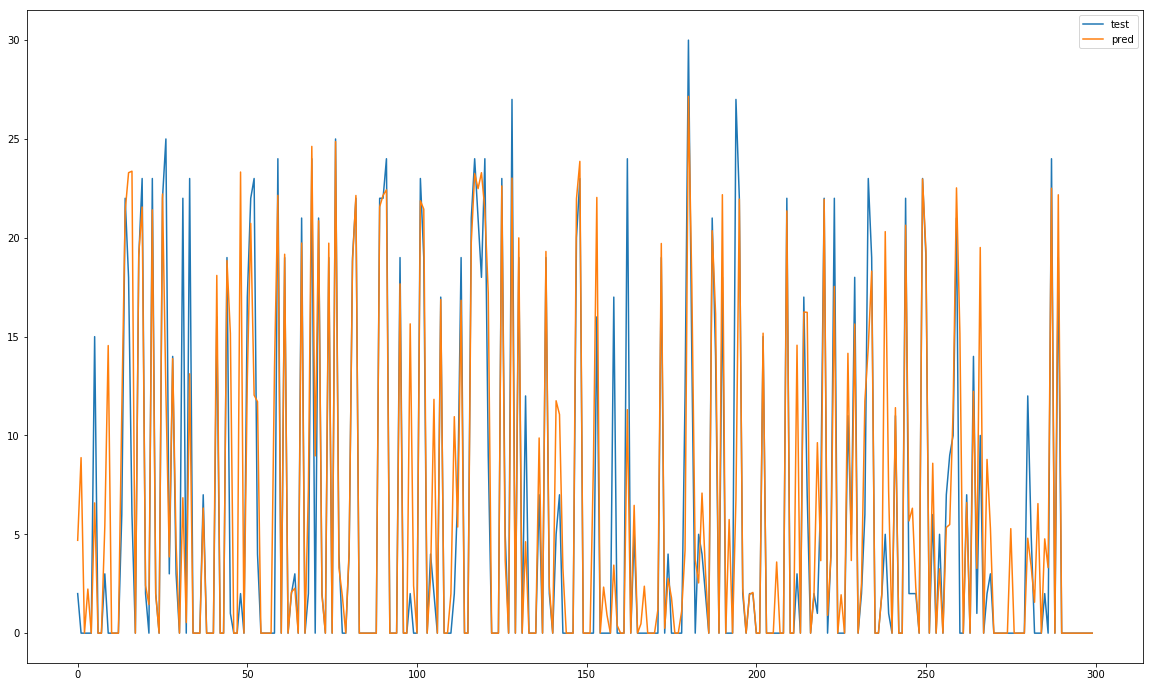

In [25]:
ind = range(300)
plt.subplots(figsize = (20,12))
plt.plot(y_test[ind], label = 'test')
plt.plot(y_pred[ind], label = 'pred')
plt.legend()
plt.show()

In [37]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [40]:
onehot_encoder = OneHotEncoder(categories='auto', sparse = False)
onehot_encoded = onehot_encoder.fit_transform(y.reshape(-1, 1))
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 0)

In [8]:
model = RandomForestClassifier(n_estimators=100, min_samples_leaf=10,random_state=1,verbose = 1, n_jobs = -1 )
model.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   30.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.7min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=1, verbose=1, warm_start=False)

In [41]:
model = lgb.LGBMClassifier(boosting_type='gbdt', objective='multiclass',
                       num_class=32,num_iteration=200,num_leaves=31,
                       is_enable_sparse='true',tree_learner='data',min_data_in_leaf=600,max_depth=4,
                       learning_rate=0.01, n_estimators=675, max_bin=255, subsample_for_bin=50000, 
                       min_split_gain=5, min_child_weight=5, min_child_samples=10, subsample=0.995, 
                       subsample_freq=1, colsample_bytree=1, reg_alpha=0, 
                       reg_lambda=0, seed=0, nthread=-1, silent=True)
model.fit(X_train, y_train)
print(classification_report(model.predict(X_test), y_test))

C:\Users\yurin\Anaconda3\lib\site-packages\lightgbm\engine.py:118: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\yurin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\yurin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\yurin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


              precision    recall  f1-score   support

           0       0.99      0.41      0.58    747319
           1       0.00      0.00      0.00         0
           2       0.89      0.41      0.56    304756
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         0
          17       0.00    

In [ ]:
# rnti is renewed only when 10 seconds pass
delta_rnti_renewal = timedelta(seconds = 10)

# list where single dataframe for each user is saved
users = []
# list where last time of wach user is saved
last_time = []

# structure where on first row the index is set to 1 when rnti has been found 
# and the second row save the idnex of users and last time lists
current_users = np.zeros((65536,2), dtype = np.int)

# tqdm progress bar
with tqdm(total=len(df)) as pbar:
    for index, row in df.iterrows():
        # if already found user
        if current_users[row.rnti,0]:
            # if the current row is generated by the same rnti because the date is nearer than 10s
            if row.dates < last_time[current_users[row.rnti,1]] + delta_rnti_renewal:
                # already existing user so append the current row 
                users[current_users[row.rnti,1]].append(row)
                # save the last timestep
                last_time[current_users[row.rnti,1]] = row.dates

            else:
                # user found but the rnti has been renewed so append new data
                users.append([row])
                last_time.append(row.dates)

                current_users[row.rnti,1] = len(users) - 1
        else:
            # user not found so flag the rnti index and append the new data
            users.append([row])
            last_time.append(row.dates)

            current_users[row.rnti,0] = 1
            current_users[row.rnti,1] = len(users) - 1
        pbar.update(1)

for index, user in enumerate(users):
    users[index] = pd.DataFrame(user)
print('Found {} users'.format(len(users)))

 52%|█████▏    | 5535765/10628508 [12:03<09:44, 8711.08it/s]  